In [64]:
%%load_ext autoreload
%%autoreload 2
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import data_strings
import plotting.plot_octagon as plot_octagon
import plotting.plot_probability_chose_wall as plot_probability_chose_wall
import plotting.plot_trajectory as plot_trajectory
import analysis.wall_visibility_and_choice as wall_visibility_and_choice

### Generic starting point for work on session data

In [65]:
single_session_index = 18

In [66]:
data_folder = data_strings.DATA_FOLDER
json_filename_social = data_strings.JSON_FILENAMES_SOCIAL[single_session_index]
json_filenames_solo = data_strings.JSON_FILENAMES_SOLO[single_session_index*4 : single_session_index*4+4]

In [67]:
json_filenames_solo

['240115_2\\2025-01-15_16-14-40_YuChunFirstSolo.json',
 '240115_2\\2025-01-15_16-50-13_YuChunSecondSocial.json',
 '240115_2\\2025-01-15_16-14-58_RuiqingFirstSolo.json',
 '240115_2\\2025-01-15_16-50-37_RuiqingSecondSolo.json']

In [68]:
dfs_solo, trials_lists_solo = prepare_data.prepare_data(data_folder, json_filenames_solo, combine=False)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Users\\Tom\\OneDrive\\PhD\\SWC\\data\\240115_2\\2025-01-15_16-14-40_YuChunFirstSolo.json'

In [58]:
df_social, trials_list_social = prepare_data.prepare_data(data_folder, json_filename_social, combine=False)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\250115_2\2025-01-15_16-27-23_YuChunRuiqingSocial.json
Loading complete.
Preprocessing complete.


### plot session trajectories

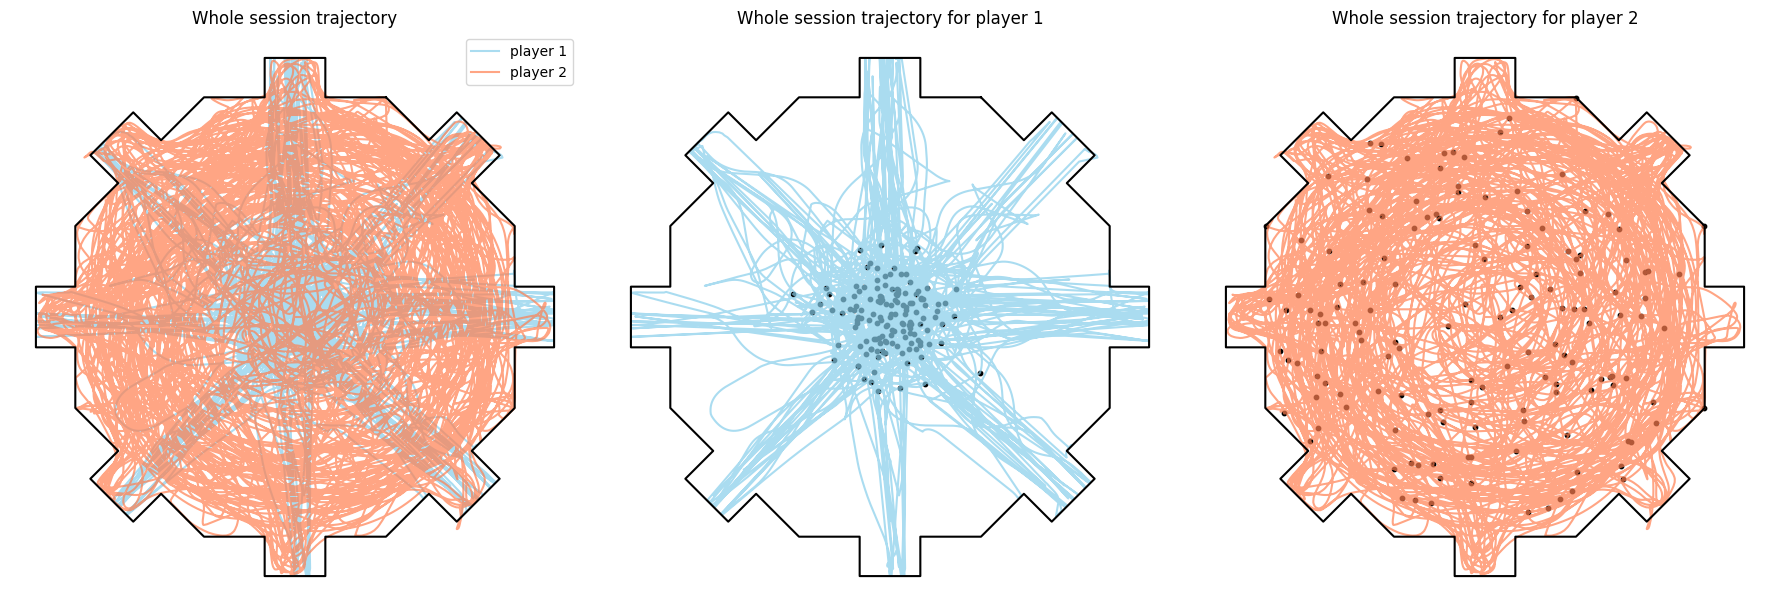

In [53]:
# plot the full session trajectory for player 0, player 1, and combined

fig, axs = plt.subplots(1,3,figsize=(15*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], df_social)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], df_social, chosen_player=0)
axs[1] = plot_trajectory.mark_session_slice_onsets(axs[1], df_social, chosen_player=0, s=10)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

axs[2] = plot_trajectory.plot_session_trajectory(axs[2], df_social, chosen_player=1)
axs[2] = plot_octagon.plot_octagon(axs[2])
axs[2] = plot_trajectory.mark_session_slice_onsets(axs[2], df_social, chosen_player=1, s=10)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])


axs[0].legend()

plt.tight_layout()

plt.show()


### plot solo trajectories

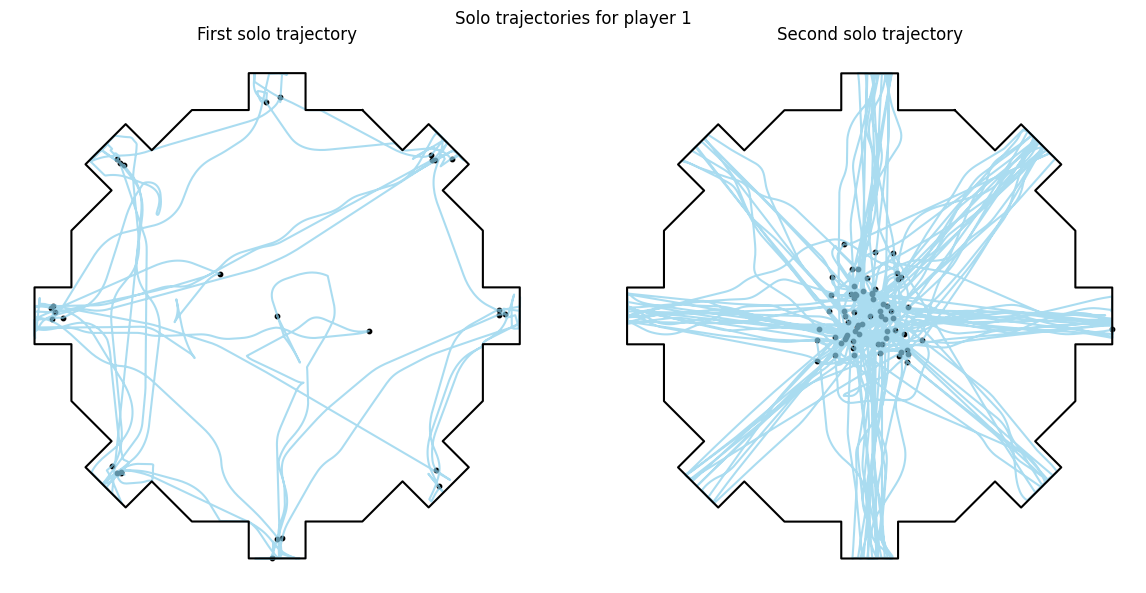

In [9]:
chosen_player = 0

fig, axs = plt.subplots(1,2,figsize=(10*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], dfs_solo[0], alpha=0.7)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[0], dfs_solo[0], chosen_player=chosen_player)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
axs[0].set_title("First solo trajectory")

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], dfs_solo[1], alpha=0.7)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[1], dfs_solo[1], chosen_player=chosen_player)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
axs[1].set_title("Second solo trajectory")
plt.suptitle(f"Solo trajectories for player {chosen_player+1}")
plt.tight_layout()

plt.show()


In [10]:
chosen_player*2

0

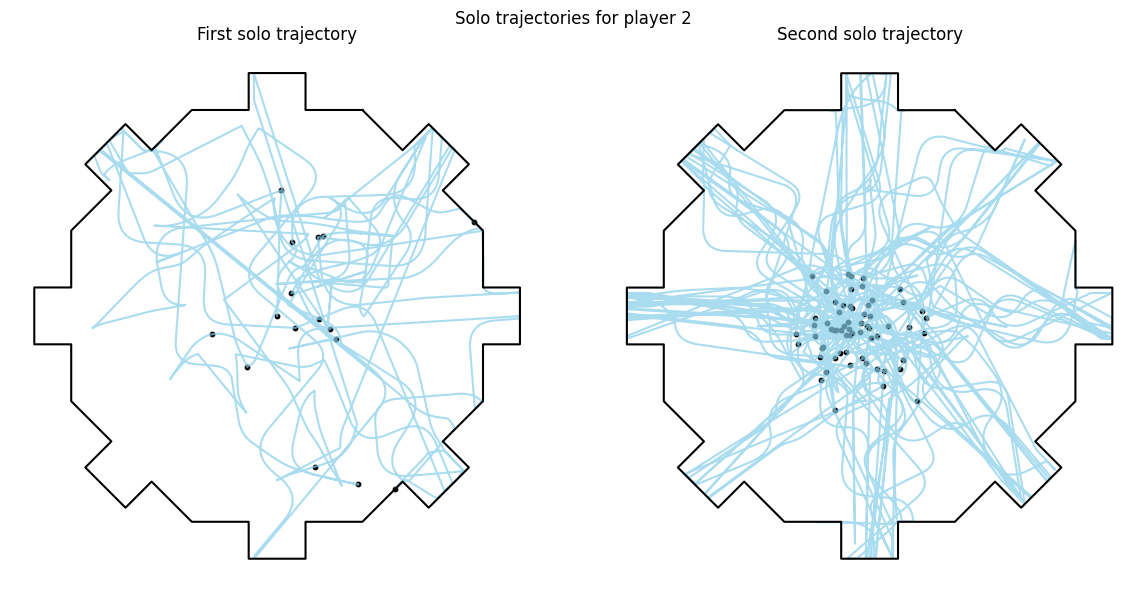

In [11]:
chosen_player = 1

fig, axs = plt.subplots(1,2,figsize=(10*1.2,5*1.2))

axs[0] = plot_trajectory.plot_session_trajectory(axs[0], dfs_solo[chosen_player*2], alpha=0.7)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[0], dfs_solo[chosen_player*2], chosen_player=0)
axs[0] = plot_octagon.plot_octagon(axs[0])
for spine in axs[0].spines.values():
    spine.set_visible(False)
axs[0].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])
axs[0].set_title("First solo trajectory")

axs[1] = plot_trajectory.plot_session_trajectory(axs[1], dfs_solo[chosen_player*2+1], alpha=0.7)
axs[0] = plot_trajectory.mark_session_slice_onsets(axs[1], dfs_solo[chosen_player*2+1], chosen_player=0)
axs[1] = plot_octagon.plot_octagon(axs[1])
for spine in axs[1].spines.values():
    spine.set_visible(False)
axs[1].tick_params(left=False, bottom=False)  # Turn off major ticks
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])
axs[1].set_title("Second solo trajectory")
plt.suptitle(f"Solo trajectories for player {chosen_player+1}")
plt.tight_layout()

plt.show()


### plot probability choose high

In [12]:
(probability_choose_high_social_array,
probability_choose_high_solo_array,
probability_choose_high_solo_array_first_session,
probability_choose_high_solo_array_second_session) = plot_probability_chose_wall.get_probability_chose_high_solo_social_all_sessions_df(trials_lists_solo,
                                                                                                                                        [trials_list_social],
                                                                                                                                        wall_sep=None,
                                                                                                                                        trial_type=globals.HIGH_LOW,
                                                                                                                                        cut_solo_trials=5)  

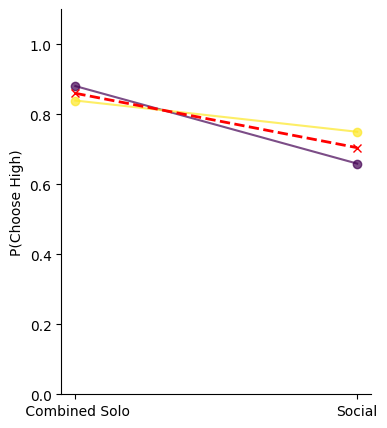

In [13]:
plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array, black_lines=False)

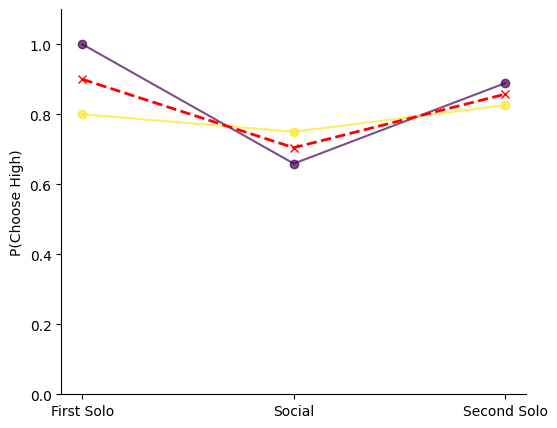

In [14]:
plot_probability_chose_wall.plot_probability_choose_high_solo_social(probability_choose_high_social_array, probability_choose_high_solo_array_first_session,
                                                                     probability_choose_high_solo_array_second_session, black_lines=False)

In [16]:
(probability_first_wall_chosen_when_low_array,
  _,
  probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social([trials_list_social])

(probability_first_wall_chosen_when_high_array,
  _,
  probability_first_wall_chosen_array)  = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_social([trials_list_social], reverse=True)

wall_choice_probabilities = [probability_first_wall_chosen_array, probability_first_wall_chosen_when_low_array, probability_first_wall_chosen_when_high_array] 
wall_choice_labels = ['First Wall Seen', 'First Wall Seen (Low)', 'First Wall Seen (High)']


trial list index: 0
player num: 0
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 1.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 3.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser's choice, or inferred choice not used
 first_vis_wall_chosen: nan
 this_player_this_trial_first_visible_wall_chosen: nan
 player wall choice this trial: 3.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: 6.0
 this_player_this_trial_first_visible_wall_chosen: True
 player wall choice this trial: nan
not confident in loser

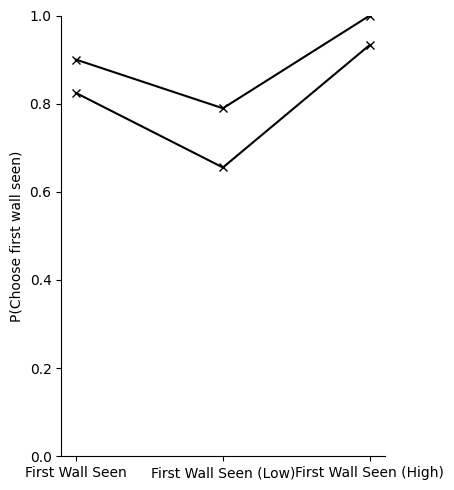

In [24]:
# Plot
plt.figure(figsize=(4, 5))

for i in range(1):
    plt.plot(np.arange(len(wall_choice_labels)), [wall_choice_probabilities[0][i], wall_choice_probabilities[1][i], wall_choice_probabilities[2][i]], color='k', linestyle='-', marker='x')


# plt.title("Probability of Choosing First Wall Seen vs. First Wall Seen (Low)")
plt.ylabel("P(Choose first wall seen)")
plt.xlabel("")
plt.ylim(0.0, 1)  # Set y-axis limits for probabilities
plt.gca().set_aspect(3)
plt.tight_layout()

# Set x-ticks to correspond to categorical labels
plt.xticks(np.arange(len(wall_choice_labels)), wall_choice_labels)

# Remove top and bottom spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()
